<center><h1><b>HR Analytics Employee Attrition & Performance</b></h1></center>

---

*Analyzed by: Dendi Apriyandi*


Dataset:
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Data Preparation

# Identification of Problems

## Problem Topics

Melakukan prediksi *turnover* karyawan perusahaan menggunakan dataset dari Kaggle

# Data Overview

| Column Name                | Description                                  |
|----------------------------|----------------------------------------------|
| Age                        | The age of the employee                      |
| Attrition                  | Whether the employee has left the company    |
| BusinessTravel             | Frequency of business travel                 |
| DailyRate                  | The daily rate of pay for the employee       |
| Department                 | Department in which the employee works       |
| DistanceFromHome           | Distance from home to work in miles          |
| Education                  | Level of education of the employee           |
| EducationField             | Field of education of the employee           |
| EnvironmentSatisfaction     | Satisfaction level with the work environment |
| Gender                     | Gender of the employee                       |
| HourlyRate                 | Hourly rate of pay for the employee          |
| JobInvolvement             | Level of job involvement                     |
| JobLevel                   | Level of job within the company              |
| JobRole                    | Role of the employee in the company          |
| JobSatisfaction            | Satisfaction level with the job              |
| MaritalStatus              | Marital status of the employee               |
| MonthlyIncome              | Monthly income of the employee               |
| MonthlyRate                | Monthly rate of pay for the employee         |
| NumCompaniesWorked         | Number of companies the employee has worked for |
| OverTime                   | Whether the employee works overtime or not   |
| PercentSalaryHike          | Percentage increase in salary                |
| PerformanceRating          | Performance rating of the employee           |
| RelationshipSatisfaction   | Satisfaction level with work relationships   |
| StockOptionLevel           | Level of stock option                        |
| TotalWorkingYears          | Total number of years worked                 |
| TrainingTimesLastYear      | Number of training sessions attended last year |
| WorkLifeBalance            | Level of work-life balance                   |
| YearsAtCompany             | Number of years spent at the company         |
| YearsInCurrentRole         | Number of years in the current role          |
| YearsSinceLastPromotion    | Number of years since the last promotion     |
| YearsWithCurrManager       | Number of years with the current manager     |


# Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut

## Import Library

In [ ]:
# Import essential libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations

# Import statistical functions and distributions
from scipy import stats  # For statistical computations

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt  # For creating plots and figures
import seaborn as sns  # For enhanced data visualizations
import plotly.graph_objects as go  # For detailed visualizations
from plotly.subplots import make_subplots  # For creating subplots
import plotly.express as px  # For quick and simple plots

# Import machine learning libraries
import sklearn  # General machine learning tools
from sklearn.linear_model import LinearRegression  # For linear regression modeling
from sklearn.metrics import mean_absolute_error  # For calculating mean absolute error
from sklearn.metrics import r2_score  # For calculating R-squared score
from sklearn.metrics import mean_squared_error  # For calculating mean squared error
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables
from sklearn.linear_model import ElasticNet  # For Elastic Net regression model
from scipy.stats import pearsonr  # For calculating Pearson correlation coefficient

# For setting random seed
from numpy.random.mtrand import random  # For generating random numbers

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split  # For splitting datasets

# For scaling data
from sklearn.preprocessing import MinMaxScaler  # For normalizing or scaling data

# For encoding ordinal data
from sklearn.preprocessing import OrdinalEncoder  # For encoding ordinal categorical features

# For saving models and data
import pickle  # For serializing and saving models and data
import json  # For handling JSON data

# For managing warnings
import warnings  # To control warning messages
warnings.filterwarnings('ignore')  # Suppress warnings

# For Google Colab integration (if working in Google Colab)
from google.colab import drive  # To access Google Drive in Colab

## Load Dataset

### From Google Drive

In [ ]:
# Force remount to refresh authentication
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read the dataset from drive
df = pd.read_csv('/content/drive/MyDrive/Project (Portofolio)/HR Analytics Employee Attrition & Performance/hr-analytics-employee-attrition-and-Performance.csv')  # Read the file after mounting

# Adjust Pandas settings to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame:
df.head()  # Show the first 5 rows to get an overview of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### From Local

In [ ]:
# # Adjust Pandas settings to display all columns in the output
# pd.set_option('display.max_columns', None)

# # Read DataFrame from CSV file:
# df = pd.read_csv('hr-analytics-employee-attrition-and-Performance.csv')  # Load data from 'hr-analytics-employee-attrition-and-Performance.csv' into a DataFrame

Dataset `hr-analytics-employee-attrition-and-Performance.csv` telah berhasil di-load

### Create Copy of Dataset for Data Overview

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_view = df.copy()

# Display the first 5 rows of the DataFrame:
df_view.head()  # Show the first 5 rows to get an overview of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Number of Rows and Columns

In [ ]:
# Get the number of rows and columns:
num_rows, num_columns = df_view.shape  # Unpack the shape of the DataFrame into number of rows and columns

# Print the number of rows:
print("Number of rows:", num_rows)  # Output the number of rows

# Print the number of columns:
print("Number of columns:", num_columns)  # Output the number of columns

Number of rows: 1470
Number of columns: 35


## Data Information

In [ ]:
# Get a concise summary of the DataFrame:
df_view.info()  # Displays information about the DataFrame, including the number of non-null entries, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Value

In [ ]:
# Count the number of missing values in each column:
df_view.isnull().sum()  # Returns the total number of missing (null) values for each column in the DataFrame

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


tidak terdapat missing value pada kolom dataset

## Data Type

In [ ]:
# Get the data types of each column:
df_view.dtypes  # Displays the data type of each column in the DataFrame

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


## Summary Statistics for Categorical Columns

In [ ]:
# Get descriptive statistics for categorical columns and transpose the result:
df_view.describe(include=object).T  # Displays summary statistics for categorical columns, transposed for easier viewing

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [ ]:
df_view.describe(exclude=object).T  # Displays summary statistics for all columns, transposed for easier viewing

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Tabel diatas menampilkan informasi singkat statistik deskriptif dataset

## Columns

In [ ]:
# Get the column names of the DataFrame:
df_view.columns # Returns a list of column names in the DataFrame

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Kolom-kolom yang terdapat pada dataset bisa kita ketahui setelah menjalankan syntax **df.columns**

## Unique Value

In [ ]:
df_view.nunique()  # Returns the number of unique values for each column in the DataFrame

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


kolom `EmployeeCount`, `EmployeeNumber`, `Over18`, `StandardHours` hanya memiliki satu unique value (tidak berguna), oleh karena itu akan dihapus

In [ ]:
# Drop the specified columns
df_view = df_view.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)


## Duplicated Rows

In [ ]:
# Count the number of duplicated rows in the DataFrame:
num_duplicated_rows = df_view.duplicated().sum()  # Calculate the number of duplicated rows

# Print the count of duplicated rows:
print("Duplicated Rows:", num_duplicated_rows)  # Output the count of duplicated rows

Duplicated Rows: 0


# Explolatory Data Analysis

Bagian ini berisi eksplorasi data pada dataset dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Create Copy of Dataset for EDA

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_eda = df_view.copy()

# Display the first 5 rows of the DataFrame:
df_eda.head()  # Show the first 5 rows to get an overview of the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## Distribution of Monthly Income

In [ ]:
# Calculate the mean, mode, and median of the 'Monthly Income' column
mean_income = df_eda['MonthlyIncome'].mean()        # Calculate the average (mean) Monthly Income
mode_income = df_eda['MonthlyIncome'].mode()[0]     # Calculate the most frequent (mode) Monthly Income
median_income = df_eda['MonthlyIncome'].median()    # Calculate the middle value (median) Monthly Income

# Display the results
print("Mean Monthly Income   :", mean_income)  # Print the mean Monthly Income
print("Mode Monthly Income   :", mode_income)  # Print the mode Monthly Income
print("Median Monthly Income :", median_income)  # Print the median Monthly Income


Mean Monthly Income   : 6502.931292517007
Mode Monthly Income   : 2342
Median Monthly Income : 4919.0


In [ ]:
# Calculate the skewness of the 'MonthlyIncome' column
skewness_income = df_eda['MonthlyIncome'].skew()  # Skewness indicates the asymmetry of the distribution

# Print the skewness value and interpret the result
print("Skewness Monthly Income : ", skewness_income)  # Print the skewness value
if skewness_income > 0:
    print("Right skewed distribution (positive skewness)")  # Positive skewness indicates a right skew
elif skewness_income < 0:
    print("Left skewed distribution (negative skewness)")  # Negative skewness indicates a left skew
else:
    print("Normal distribution (zero skewness)")  # Zero skewness indicates a symmetric (normal) distribution


Skewness Monthly Income :  1.3698166808390662
Right skewed distribution (positive skewness)


Text(0, 0.5, 'Frequency')

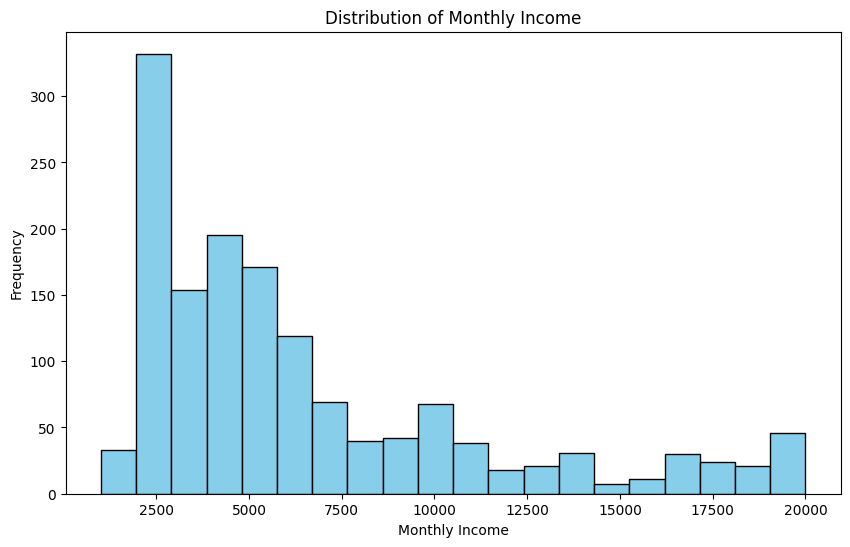

In [ ]:
# Create a histogram for the 'MonthlyIncome' column
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.hist(df_eda['MonthlyIncome'], bins=20, color='skyblue', edgecolor='black')  # Plot the histogram with 20 bins, skyblue color, and black edges
plt.title('Distribution of Monthly Income')  # Add a title to the histogram
plt.xlabel('Monthly Income')  # Label the x-axis as 'MonthlyIncome'
plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'

Berdasarkan histogram dan perhitungan central tendency dapat dilihat bahwa rata-rata gaji bulanan perkerja adalah 6502

## Attrition Age Distribution by Gender

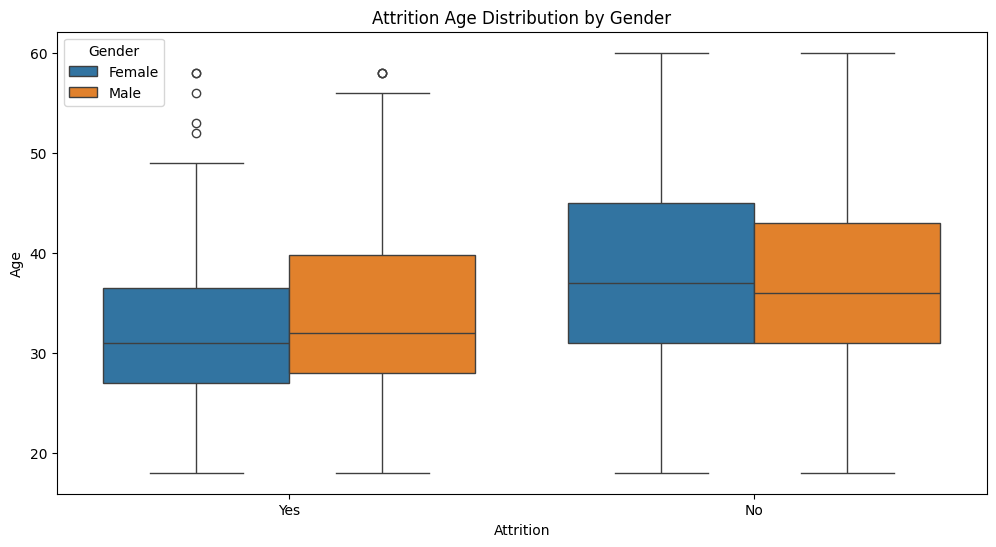

In [ ]:
# Create a figure and axes
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a boxplot to visualize the distribution of Age by Attrition and Gender
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=df_eda)  # Create the boxplot

# Add title and labels
plt.title('Attrition Age Distribution by Gender')  # Set the plot title
plt.xlabel('Attrition')  # Label the x-axis
plt.ylabel('Age')  # Label the y-axis

# Display the plot
plt.show()  # Show the plot


- **Usia dan perbedaan jenis kelamin** tidak menunjukkan variasi yang signifikan untuk karyawan yang tetap di perusahaan, tetapi untuk karyawan yang keluar, ada sedikit perbedaan dalam distribusi usia, terutama dengan lebih banyak outlier pada karyawan perempuan yang lebih tua.

- **Attrition** cenderung terjadi pada karyawan yang lebih muda, terlihat dari median usia yang lebih rendah untuk karyawan laki-laki dan perempuan di kategori "Yes" dibandingkan dengan "No".

## Attrition Salary Distribution by Gender

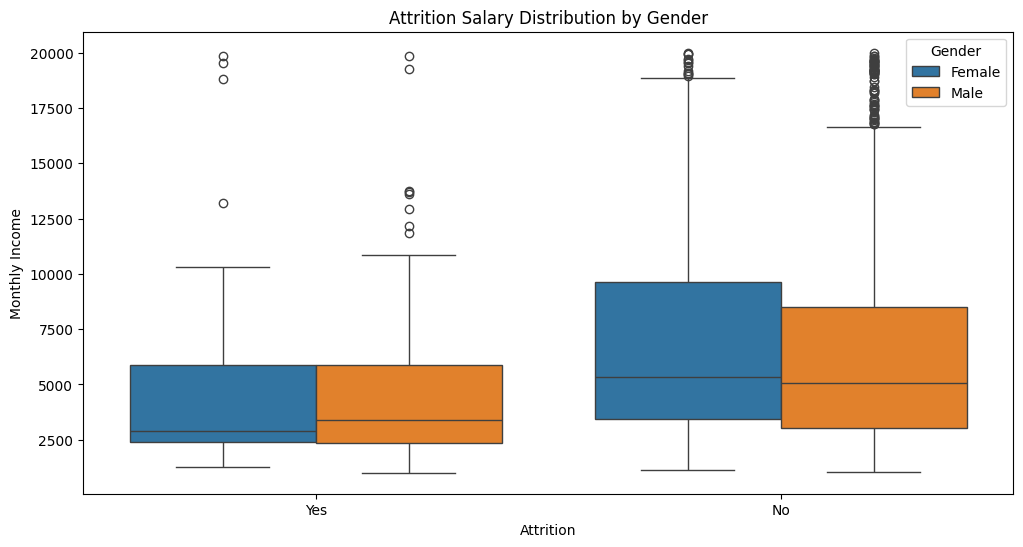

In [ ]:
# Create a figure and axes
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a boxplot to visualize the distribution of MonthlyIncome by Attrition and Gender
sns.boxplot(x='Attrition', y='MonthlyIncome', hue='Gender', data=df_eda)  # Create the boxplot

# Add title and labels
plt.title('Attrition Salary Distribution by Gender')  # Set the plot title
plt.xlabel('Attrition')  # Label the x-axis
plt.ylabel('Monthly Income')  # Label the y-axis

# Display the plot
plt.show()  # Show the plot

## Employee Attrition by Gender

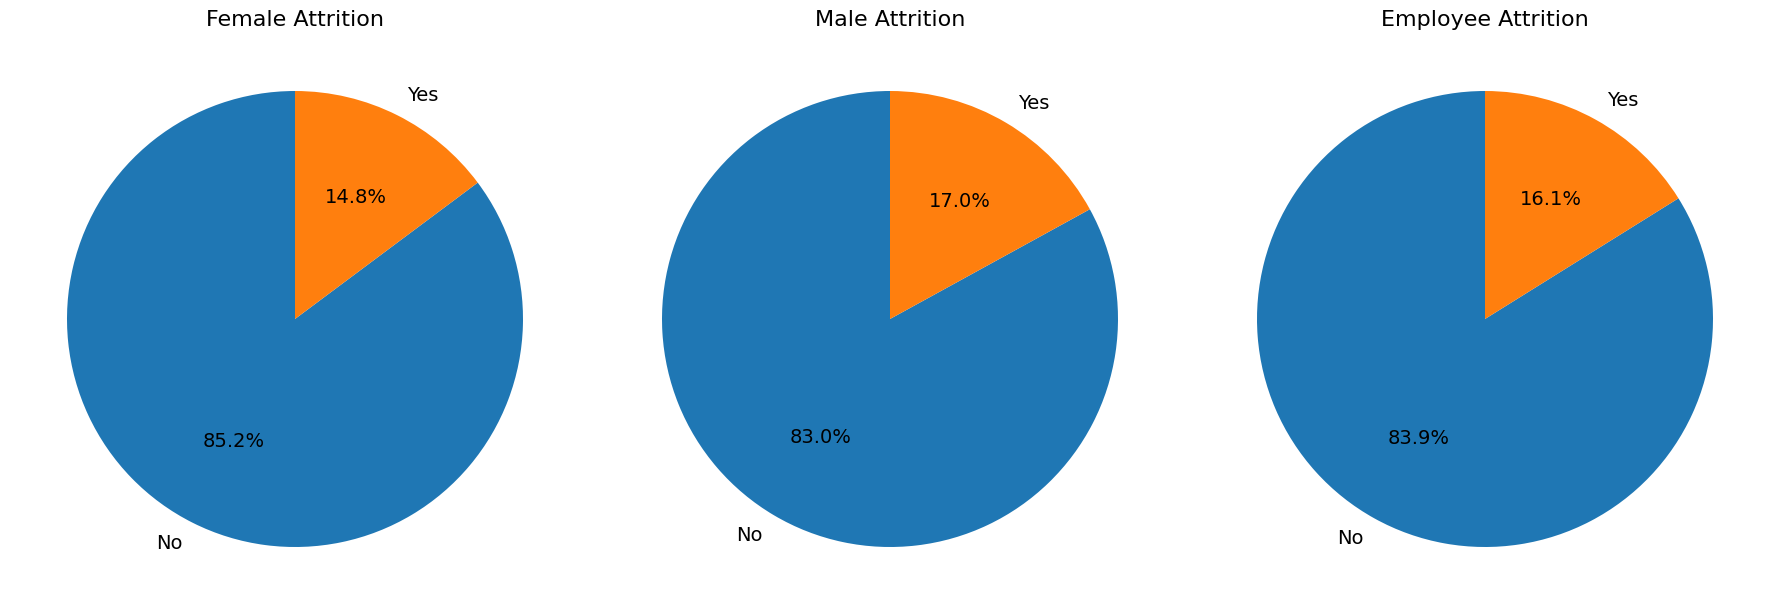

In [ ]:
# Calculate the total attrition count for each gender
attrition_by_gender = df_eda.groupby(['Gender', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Calculate the total attrition count for both genders
total_attrition = attrition_by_gender.sum(axis=1).sum()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for female attrition
axes[0].pie(attrition_by_gender.loc['Female'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0].set_title('Female Attrition', fontsize=16)

# Pie chart for male attrition
axes[1].pie(attrition_by_gender.loc['Male'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1].set_title('Male Attrition', fontsize=16)

# Pie chart for employee attrition
axes[2].pie([total_attrition - attrition_by_gender.sum(axis=0)['Yes'], attrition_by_gender.sum(axis=0)['Yes']], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[2].set_title('Employee Attrition', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Department wise Employee Attrtition

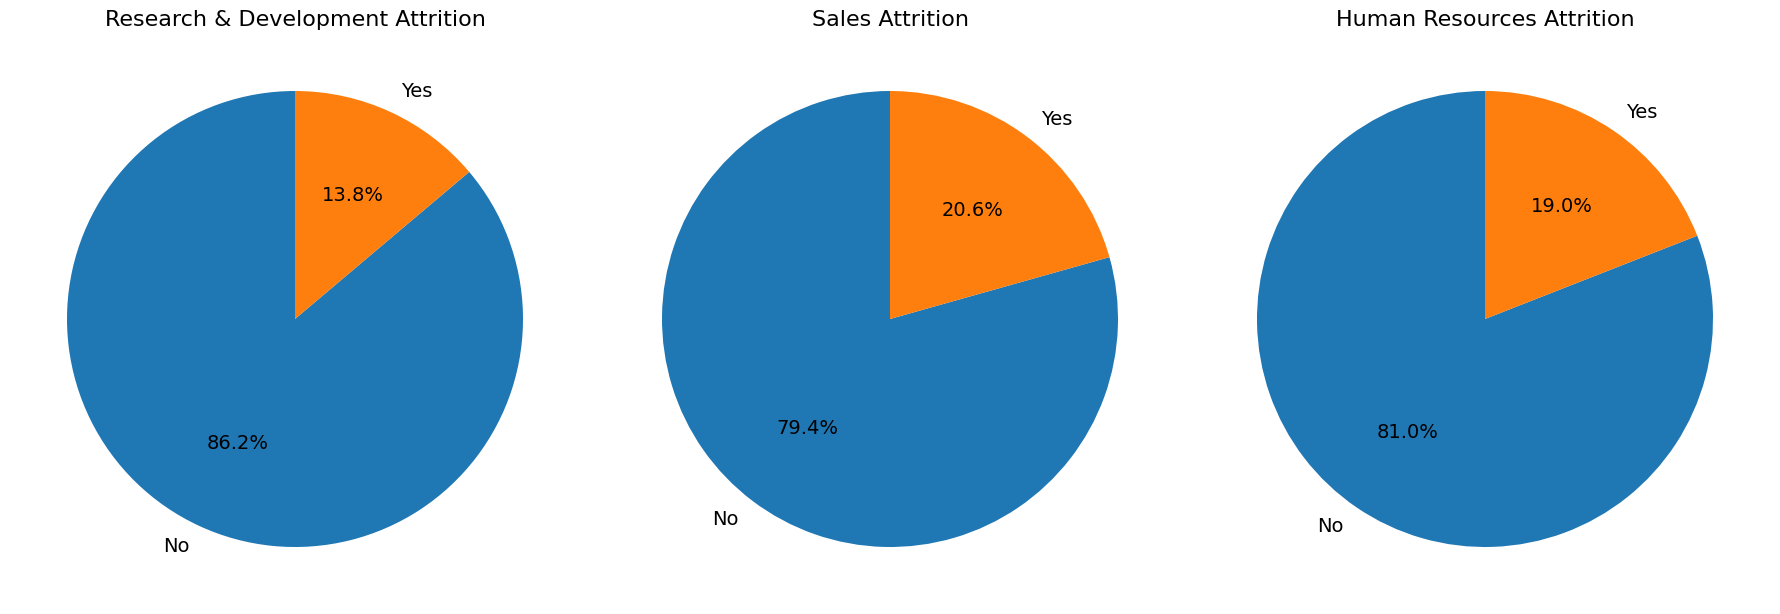

In [ ]:
# prompt: Attrtition Employee by Department pie chart seperti sebelumnya tapi tanpa total attritionnya

import matplotlib.pyplot as plt
# Calculate the total attrition count for each department
attrition_by_department = df_eda.groupby(['Department', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Research & Development attrition
axes[0].pie(attrition_by_department.loc['Research & Development'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0].set_title('Research & Development Attrition', fontsize=16)

# Pie chart for Sales attrition
axes[1].pie(attrition_by_department.loc['Sales'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1].set_title('Sales Attrition', fontsize=16)

# Pie chart for Human Resources attrition
axes[2].pie(attrition_by_department.loc['Human Resources'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[2].set_title('Human Resources Attrition', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Employee Attrition based on Business Travel

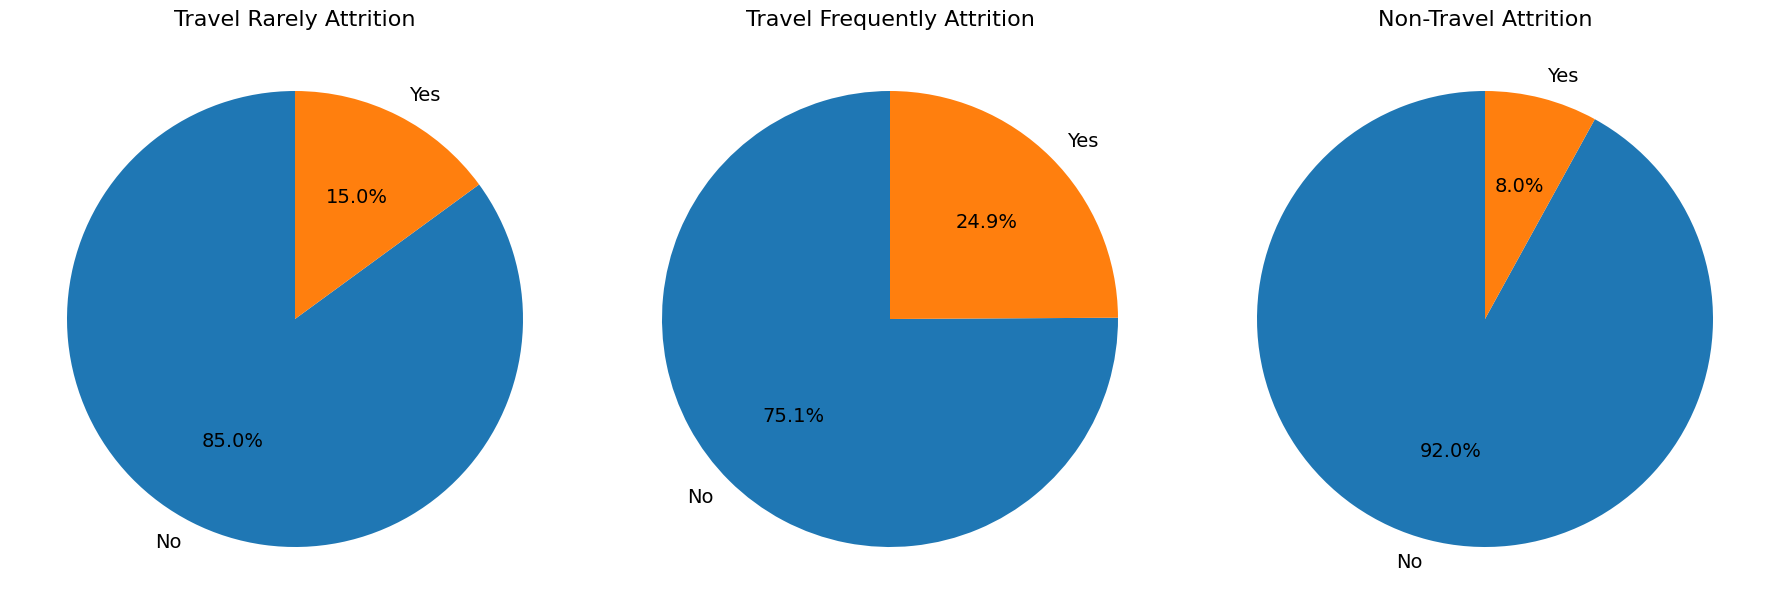

In [ ]:
# Calculate the total attrition count for each business travel frequency
attrition_by_business_travel = df_eda.groupby(['BusinessTravel', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Travel_Rarely attrition
axes[0].pie(attrition_by_business_travel.loc['Travel_Rarely'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0].set_title('Travel Rarely Attrition', fontsize=16)

# Pie chart for Travel_Frequently attrition
axes[1].pie(attrition_by_business_travel.loc['Travel_Frequently'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1].set_title('Travel Frequently Attrition', fontsize=16)

# Pie chart for Non-Travel attrition
axes[2].pie(attrition_by_business_travel.loc['Non-Travel'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[2].set_title('Non-Travel Attrition', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Employee Attrition based on Education Field

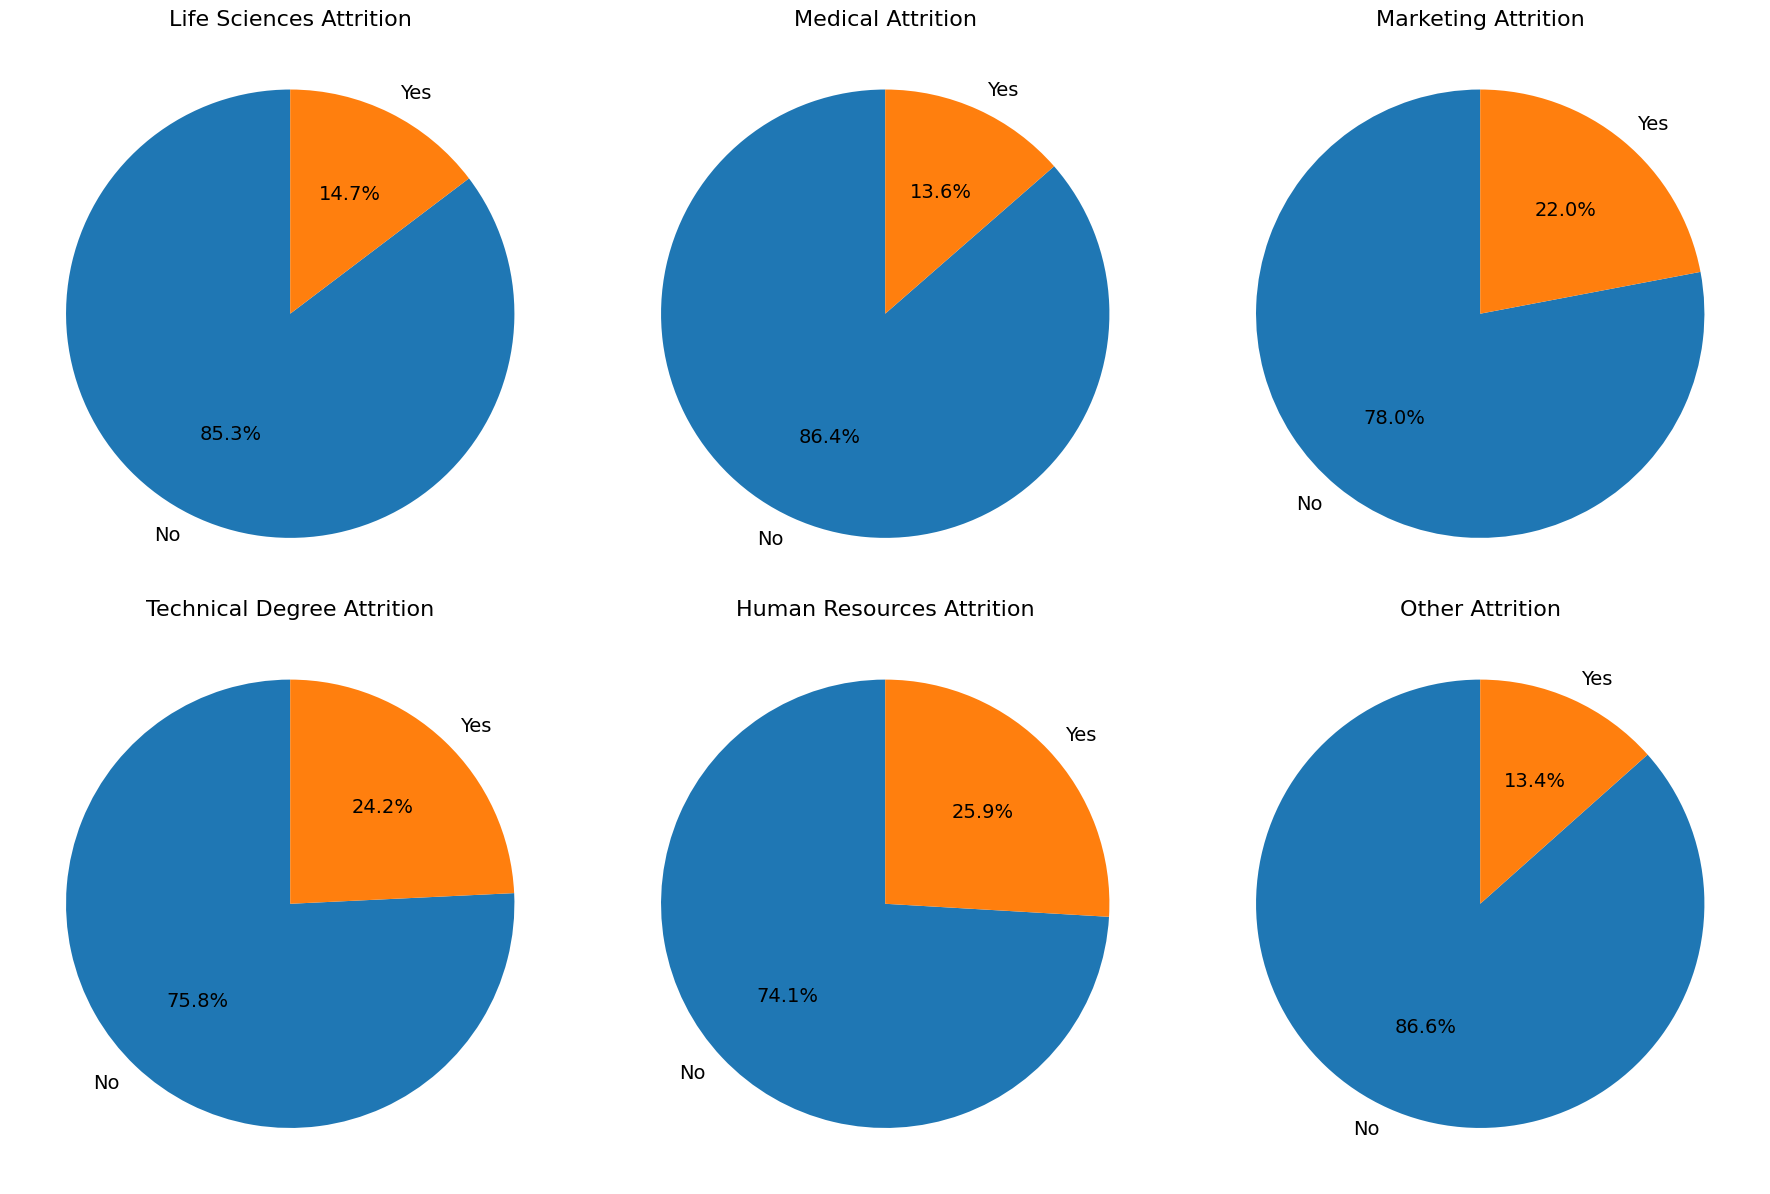

In [ ]:
# Calculate the total attrition count for each education field
attrition_by_education_field = df_eda.groupby(['EducationField', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Pie chart for Life Sciences attrition
axes[0, 0].pie(attrition_by_education_field.loc['Life Sciences'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 0].set_title('Life Sciences Attrition', fontsize=16)

# Pie chart for Medical attrition
axes[0, 1].pie(attrition_by_education_field.loc['Medical'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 1].set_title('Medical Attrition', fontsize=16)

# Pie chart for Marketing attrition
axes[0, 2].pie(attrition_by_education_field.loc['Marketing'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 2].set_title('Marketing Attrition', fontsize=16)

# Pie chart for Technical Degree attrition
axes[1, 0].pie(attrition_by_education_field.loc['Technical Degree'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1, 0].set_title('Technical Degree Attrition', fontsize=16)

# Pie chart for Human Resources attrition
axes[1, 1].pie(attrition_by_education_field.loc['Human Resources'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1, 1].set_title('Human Resources Attrition', fontsize=16)

# Pie chart for Other attrition
axes[1, 2].pie(attrition_by_education_field.loc['Other'], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1, 2].set_title('Other Attrition', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Employee Attrition based on Job Roles

<Figure size 1200x800 with 0 Axes>

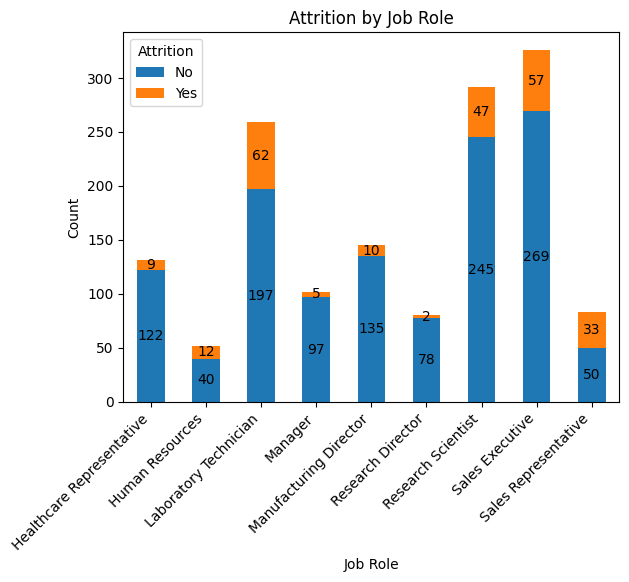

In [ ]:
# Calculate the total attrition count for each job role
attrition_by_job_role = df_eda.groupby(['JobRole', 'Attrition'])['Attrition'].count().unstack().fillna(0)

# Create a figure and axes
plt.figure(figsize=(12, 8))  # Set the figure size

# Create a stacked bar chart
attrition_by_job_role.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value annotations to the bars
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
              y+height/2,
              '{:.0f}'.format(height),
              horizontalalignment='center',
              verticalalignment='center')

# Display the plot
plt.show()


## Employee Attrition by Time Dimensions

In [ ]:
# Create a subplot layout with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

# Group data by 'YearsAtCompany' and 'Attrition', calculate 'Count' of each combination
years1 = df.groupby(['YearsAtCompany', 'Attrition'], as_index=False)['Age'].count()
years1['Count'] = years1['Age']
years1.drop(columns='Age', axis=1, inplace=True)

# Adjust 'YearsAtCompany' values by grouping all values greater than 19 as 20
years1['YearsAtCompany'] = years1['YearsAtCompany'].apply(lambda x: 20 if x > 19 else x)

# Sum up the 'Count' for grouped 'YearsAtCompany' and 'Attrition'
years1 = years1.groupby(['YearsAtCompany', 'Attrition'], as_index=False)['Count'].sum()

# Group data by 'YearsInCurrentRole' and 'Attrition'
years2 = df.groupby(['YearsInCurrentRole', 'Attrition'], as_index=False)['Age'].count()
years2['Count'] = years2['Age']
years2.drop(columns='Age', axis=1, inplace=True)

# Group data by 'YearsSinceLastPromotion' and 'Attrition'
years3 = df.groupby(['YearsSinceLastPromotion', 'Attrition'], as_index=False)['Age'].count()
years3['Count'] = years3['Age']
years3.drop(columns='Age', axis=1, inplace=True)

# Group data by 'YearsWithCurrManager' and 'Attrition'
years4 = df.groupby(['YearsWithCurrManager', 'Attrition'], as_index=False)['Age'].count()
years4['Count'] = years4['Age']
years4.drop(columns='Age', axis=1, inplace=True)

# Create bar charts for 'Years at Company' (Yes/No attrition)
fig.add_trace(go.Bar(x=years1[years1['Attrition'] == 'Yes']['YearsAtCompany'],
                     y=years1[years1['Attrition'] == 'Yes']['Count'],
                     name='Yes', marker_color='LightCoral', showlegend=False), row=1, col=1)

fig.add_trace(go.Bar(x=years1[years1['Attrition'] == 'No']['YearsAtCompany'],
                     y=years1[years1['Attrition'] == 'No']['Count'],
                     name='No', marker_color='DeepSkyBlue', showlegend=False), row=1, col=1)

# Create bar charts for 'Years in Current Role' (Yes/No attrition)
fig.add_trace(go.Bar(x=years2[years2['Attrition'] == 'Yes']['YearsInCurrentRole'],
                     y=years2[years2['Attrition'] == 'Yes']['Count'],
                     name='Yes', marker_color='LightCoral', showlegend=True), row=1, col=2)

fig.add_trace(go.Bar(x=years2[years2['Attrition'] == 'No']['YearsInCurrentRole'],
                     y=years2[years2['Attrition'] == 'No']['Count'],
                     name='No', marker_color='DeepSkyBlue', showlegend=True), row=1, col=2)

# Create bar charts for 'Years since last promotion' (Yes/No attrition)
fig.add_trace(go.Bar(x=years3[years3['Attrition'] == 'Yes']['YearsSinceLastPromotion'],
                     y=years3[years3['Attrition'] == 'Yes']['Count'],
                     name='Yes', marker_color='LightCoral', showlegend=False), row=2, col=1)

fig.add_trace(go.Bar(x=years3[years3['Attrition'] == 'No']['YearsSinceLastPromotion'],
                     y=years3[years3['Attrition'] == 'No']['Count'],
                     name='No', marker_color='DeepSkyBlue', showlegend=False), row=2, col=1)

# Create bar charts for 'Years with current manager' (Yes/No attrition)
fig.add_trace(go.Bar(x=years4[years4['Attrition'] == 'Yes']['YearsWithCurrManager'],
                     y=years4[years4['Attrition'] == 'Yes']['Count'],
                     name='Yes', marker_color='LightCoral', showlegend=False), row=2, col=2)

fig.add_trace(go.Bar(x=years4[years4['Attrition'] == 'No']['YearsWithCurrManager'],
                     y=years4[years4['Attrition'] == 'No']['Count'],
                     name='No', marker_color='DeepSkyBlue', showlegend=False), row=2, col=2)

# Update x-axis labels for each subplot
fig.update_xaxes(title_text="Years at Company", row=1, col=1)
fig.update_xaxes(title_text="Years in Current Role", row=1, col=2)
fig.update_xaxes(title_text="Years Since Last Promotion", row=2, col=1)
fig.update_xaxes(title_text="Years with Current Manager", row=2, col=2)

# Update y-axis label for subplots
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

# General layout adjustments (title, fonts, and legends)
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Attrition",
    title_text="Employee Attrition by Time Dimensions"
)

# Update traces with additional formatting (marker and lines)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))

# Add annotation to the figure
fig.add_annotation(x=0.428, y=0.528, text=">", showarrow=False, xref="paper", yref="paper")

# Show the plot
fig.show()


## Employee Attrition based on Monthly Income

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='Gender',  # X-axis represents Gender
    y='MonthlyIncome',  # Y-axis represents MonthlyIncome
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Define the color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
)

# Make sure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Show the legend
    title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Monthly Income</b>',  # Title of the plot
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()

**Interpretasi**:

1. **Attrition "Yes"**:
   - **Perempuan** dan **laki-laki** yang keluar dari perusahaan memiliki distribusi pendapatan bulanan yang serupa. Median pendapatan bulanan untuk perempuan tampaknya sedikit lebih tinggi dibandingkan laki-laki, tetapi secara keseluruhan distribusinya cukup dekat.
   - Ada beberapa **outlier** di mana pendapatan karyawan jauh di atas rentang normal (lebih dari 10.000).

2. **Attrition "No"**:
   - Bagi karyawan yang tetap bekerja di perusahaan, distribusi pendapatan untuk **perempuan** dan **laki-laki** sedikit lebih luas dibandingkan mereka yang keluar.
   - Median pendapatan untuk kedua jenis kelamin hampir sama, namun perempuan tampaknya memiliki median yang sedikit lebih tinggi.
   - Lebih banyak outlier terlihat pada kelompok ini, yang menunjukkan bahwa beberapa karyawan yang tetap bekerja memiliki pendapatan bulanan yang jauh lebih tinggi (beberapa mencapai hampir 20.000).

**Kesimpulan Utama**:

- **Rentang Pendapatan**: Untuk kelompok "Yes" dan "No", baik karyawan perempuan maupun laki-laki memiliki rentang pendapatan yang mirip.
- **Outlier**: Ada beberapa outlier di kedua kelompok, terutama di kelompok "No", di mana karyawan dengan pendapatan jauh lebih tinggi dari rata-rata lebih banyak.
- **Perbedaan Median**: Median pendapatan bulanan untuk perempuan dan laki-laki cukup dekat di kedua kelompok, namun perempuan tampaknya memiliki median yang sedikit lebih tinggi.

## Employee Attrition based on Age

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='Gender',  # X-axis represents Gender
    y='Age',  # Y-axis represents Age
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Define the color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
)

# Add an outline to the box plot markers with black color and width 0.5
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))

# Make sure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Show the legend
    title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Age</b>',  # Title of the plot
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()


## Employee Attrition based on Total Working Hours

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='Gender',  # X-axis represents Gender
    y='TotalWorkingYears',  # Y-axis represents TotalWorkingYears
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Color scheme: Yes = LightCoral, No = DeepSkyBlue
)

# Ensure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Update the layout: position of the title, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Display the legend
    title_text='<b style="color:black; font-size:105%;">Employee Attrition based on Total Working Years</b>',  # Plot title
    font_family="Times New Roman",  # Set the font style
    title_font_family="Times New Roman"  # Set the font style for the title
)

# Show the plot
fig.show()

## Employee Satisfaction Analysis

In [ ]:
# Define satisfaction levels
satisfaction_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Replace numeric values in the dataset with labels
df_eda['EnvironmentSatisfaction'] = df_eda['EnvironmentSatisfaction'].map(satisfaction_labels)
df_eda['JobSatisfaction'] = df_eda['JobSatisfaction'].map(satisfaction_labels)
df_eda['RelationshipSatisfaction'] = df_eda['RelationshipSatisfaction'].map(satisfaction_labels)

# Create a subplot with 3 pie charts
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
    subplot_titles=('Environment Satisfaction', 'Job Satisfaction', 'Relationship Satisfaction')
)

# Add pie chart for Environment Satisfaction
fig.add_trace(
    go.Pie(
        values=df_eda.groupby(['EnvironmentSatisfaction'], as_index=False)['Age'].count()['Age'],
        labels=df_eda.groupby(['EnvironmentSatisfaction'], as_index=False)['Age'].count()['EnvironmentSatisfaction'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral', 'PaleGreen'],
        name='Environment Satisfaction',
        showlegend=False
    ),
    row=1, col=1
)

# Add pie chart for Job Satisfaction
fig.add_trace(
    go.Pie(
        values=df_eda.groupby(['JobSatisfaction'], as_index=False)['Age'].count()['Age'],
        labels=df_eda.groupby(['JobSatisfaction'], as_index=False)['Age'].count()['JobSatisfaction'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral', 'PaleGreen'],
        name='Job Satisfaction',
        showlegend=False
    ),
    row=1, col=2
)

# Add pie chart for Relationship Satisfaction
fig.add_trace(
    go.Pie(
        values=df_eda.groupby(['RelationshipSatisfaction'], as_index=False)['Age'].count()['Age'],
        labels=df_eda.groupby(['RelationshipSatisfaction'], as_index=False)['Age'].count()['RelationshipSatisfaction'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightSalmon', 'LightCoral', 'PaleGreen'],
        name='Relationship Satisfaction',
        showlegend=True
    ),
    row=1, col=3
)

# Update text positions and layout
fig.update_traces(textposition='outside', textinfo='percent')
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Satisfaction",
    title_text='Employee Satisfaction Analysis'
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Show the figure
fig.show()


## Employee Attrition based on Job Satisfaction

In [ ]:
# Group data by Job Satisfaction and Attrition
bus = df_eda.groupby(['JobSatisfaction', 'Attrition'], as_index=False)['Age'].count()
bus.rename(columns={'Age': 'Count'}, inplace=True)

# Create a subplot with 4 pie charts
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
    subplot_titles=('Very High', 'High', 'Medium', 'Low')
)

# Add pie chart for Very High Job Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['JobSatisfaction'] == 'Very High']['Count'],
        labels=bus[bus['JobSatisfaction'] == 'Very High']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Very High',
        showlegend=False
    ),
    row=1, col=1
)

# Add pie chart for High Job Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['JobSatisfaction'] == 'High']['Count'],
        labels=bus[bus['JobSatisfaction'] == 'High']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='High',
        showlegend=False
    ),
    row=1, col=2
)

# Add pie chart for Medium Job Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['JobSatisfaction'] == 'Medium']['Count'],
        labels=bus[bus['JobSatisfaction'] == 'Medium']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Medium',
        showlegend=False
    ),
    row=1, col=3
)

# Add pie chart for Low Job Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['JobSatisfaction'] == 'Low']['Count'],
        labels=bus[bus['JobSatisfaction'] == 'Low']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Low',
        showlegend=True
    ),
    row=1, col=4
)

# Update layout and traces
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Attrition",
    title_text='Employee Attrition based on Job Satisfaction'
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Show the figure
fig.show()


## Employee Attrition based on Environment Satisfaction

In [ ]:
# Group data by Environment Satisfaction and Attrition
bus = df_eda.groupby(['EnvironmentSatisfaction', 'Attrition'], as_index=False)['Age'].count()
bus.rename(columns={'Age': 'Count'}, inplace=True)

# Create a subplot with 4 pie charts
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
    subplot_titles=('Very High', 'High', 'Medium', 'Low')
)

# Add pie chart for Very High Environment Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['EnvironmentSatisfaction'] == 'Very High']['Count'],
        labels=bus[bus['EnvironmentSatisfaction'] == 'Very High']['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Very High',
        showlegend=False
    ),
    row=1, col=1
)

# Add pie chart for High Environment Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['EnvironmentSatisfaction'] == 'High']['Count'],
        labels=bus[bus['EnvironmentSatisfaction'] == 'High']['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='High',
        showlegend=False
    ),
    row=1, col=2
)

# Add pie chart for Medium Environment Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['EnvironmentSatisfaction'] == 'Medium']['Count'],
        labels=bus[bus['EnvironmentSatisfaction'] == 'Medium']['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Medium',
        showlegend=False
    ),
    row=1, col=3
)

# Add pie chart for Low Environment Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['EnvironmentSatisfaction'] == 'Low']['Count'],
        labels=bus[bus['EnvironmentSatisfaction'] == 'Low']['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Low',
        showlegend=True
    ),
    row=1, col=4
)

# Update layout and traces
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Attrition",
    title_text='Employee Attrition based on Environment Satisfaction'
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Show the figure
fig.show()


## Attrition based on Relationship Satisfaction

In [ ]:
# Group data by Relationship Satisfaction and Attrition
bus = df_eda.groupby(['RelationshipSatisfaction', 'Attrition'], as_index=False)['Age'].count()
bus.rename(columns={'Age': 'Count'}, inplace=True)

# Create a subplot with 4 pie charts
fig = make_subplots(
    rows=1, cols=4,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
    subplot_titles=('Very High', 'High', 'Medium', 'Low')
)

# Add pie chart for Very High Relationship Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['RelationshipSatisfaction'] == 'Very High']['Count'],
        labels=bus[bus['RelationshipSatisfaction'] == 'Very High']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Very High',
        showlegend=False
    ),
    row=1, col=1
)

# Add pie chart for High Relationship Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['RelationshipSatisfaction'] == 'High']['Count'],
        labels=bus[bus['RelationshipSatisfaction'] == 'High']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='High',
        showlegend=False
    ),
    row=1, col=2
)

# Add pie chart for Medium Relationship Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['RelationshipSatisfaction'] == 'Medium']['Count'],
        labels=bus[bus['RelationshipSatisfaction'] == 'Medium']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Medium',
        showlegend=False
    ),
    row=1, col=3
)

# Add pie chart for Low Relationship Satisfaction
fig.add_trace(
    go.Pie(
        values=bus[bus['RelationshipSatisfaction'] == 'Low']['Count'],
        labels=bus[bus['RelationshipSatisfaction'] == 'Low']['Attrition'],
        hole=0.5,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Low',
        showlegend=True
    ),
    row=1, col=4
)

# Update layout and traces
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Attrition",
    title_text='Employee Attrition based on Relationship Satisfaction'
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Show the figure
fig.show()

## Attrition based on Perfomance Rating

In [ ]:
# Use the correct dataframe df_eda for the visual
bus = df_eda.groupby(['PerformanceRating', 'Attrition'], as_index=False)['Age'].count()
bus.rename(columns={'Age': 'Count'}, inplace=True)

# Create a subplot with 2 pie charts
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

# Add pie chart for Excellent Performance Rating
fig.add_trace(
    go.Pie(
        values=bus[bus['PerformanceRating'] == 3]['Count'],  # Assuming '3' corresponds to 'Excellent'
        labels=bus[bus['PerformanceRating'] == 3]['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Excellent',
        showlegend=True
    ),
    row=1, col=1
)

# Add pie chart for Outstanding Performance Rating
fig.add_trace(
    go.Pie(
        values=bus[bus['PerformanceRating'] == 4]['Count'],  # Assuming '4' corresponds to 'Outstanding'
        labels=bus[bus['PerformanceRating'] == 4]['Attrition'],
        hole=0.7,
        marker_colors=['DeepSkyBlue', 'LightCoral'],
        name='Outstanding',
        showlegend=True
    ),
    row=1, col=2
)

# Add annotations for Excellent and Outstanding
fig.add_annotation(dict(x=0.18, y=0.5, align='center',
                        xref="paper", yref="paper",
                        showarrow=False, font_size=15,
                        text="<b>Excellent</b>"))
fig.add_annotation(dict(x=0.83, y=0.5, align='center',
                        xref="paper", yref="paper",
                        showarrow=False, font_size=15,
                        text="<b>Outstanding</b>"))

# Update trace text and layout
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_x=0.5,
    template='simple_white',
    showlegend=True,
    legend_title_text="Attrition",
    title_text='Employee Attrition based on Performance Rating'
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Show the figure
fig.show()

## Gender Wise Employee Attrition based on Distance from Home

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='Gender',  # X-axis represents Gender
    y='DistanceFromHome',  # Y-axis represents Distance from Home
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Define the color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
)

# Ensure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Display the legend
    title_text='<b style="color:black; font-size:105%;">Gender-wise Employee Attrition based on Distance from Home</b>',  # Plot title
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()


## Education Wise Employee Attrition based on Monthly Income

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='Education',  # X-axis represents Education
    y='MonthlyIncome',  # Y-axis represents Monthly Income
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Define the color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
)

# Ensure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Display the legend
    title_text='<b style="color:black; font-size:105%;">Education-wise Employee Attrition based on Monthly Income</b>',  # Title of the plot
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()


## Education Wise Employee Attrition based on % Salary Hike

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='JobRole',  # X-axis represents Job Role
    y='PercentSalaryHike',  # Y-axis represents Percent Salary Hike
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue'],  # Color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
    template='simple_white'  # Use a simple white background template
)

# Ensure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Display the legend
    title_text='<b style="color:black; font-size:105%;">Job Role-wise Employee Attrition based on % Salary Hike</b>',  # Title of the plot
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()


## Job Wise Employee Attrition based on Distance From Home

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(
    df_eda,  # DataFrame being used
    x='JobRole',  # X-axis represents Job Role
    y='DistanceFromHome',  # Y-axis represents Distance From Home
    color='Attrition',  # Color the plot based on Attrition (Yes/No)
    template='simple_white',  # Use a simple white background template
    color_discrete_sequence=['LightCoral', 'DeepSkyBlue']  # Define the color scheme for Attrition (Yes = LightCoral, No = DeepSkyBlue)
)

# Ensure the X and Y axes are visible
fig.update_xaxes(visible=True)
fig.update_yaxes(visible=True)

# Set layout: title position, template, and show the legend
fig.update_layout(
    title_x=0.5,  # Position the title in the center
    template='simple_white',  # Use a simple white template
    showlegend=True,  # Display the legend
    title_text='<b style="color:black; font-size:105%;">Job Role-wise Employee Attrition based on Distance from Home</b>',  # Title of the plot
    font_family="Times New Roman",  # Font used for the plot
    title_font_family="Times New Roman"  # Font used for the title
)

# Display the plot
fig.show()


# Conclusion

Based on the analysis of the employee attrition dataset, we can draw the following conclusions:


*   **Job Satisfaction and Environment Satisfaction:**  Employees with lower levels of Job Satisfaction and Environment Satisfaction are more likely to leave the company.
*   **Relationship Satisfaction:** Employees with low Relationship Satisfaction are more prone to attrition.
*   **Performance Rating:** Employees with excellent performance are more likely to stay, although both excellent and outstanding performing employees show lower rates of attrition.
*   **Gender and Distance from Home:**  There does not appear to be a significant relationship between gender and distance from home when it comes to attrition, although attrition seems to be more common in male employees.
*   **Education and Monthly Income:** Education level and monthly income don't show strong correlations to attrition.
*   **Job Role and Salary Hike/Distance from Home:** Job roles and salary hikes/distance from home can also provide insights into why employees may leave.

These insights can be utilized by HR and management to address potential issues impacting employee retention. They can focus on improving the work environment, enhancing employee relationships, and providing better performance feedback and recognition. By understanding the key drivers of attrition, organizations can implement targeted strategies to retain valuable employees and improve overall employee satisfaction and productivity.
